In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import random

tf.enable_eager_execution()

In [13]:
def load_image(path):
    image = tf.read_file(path)             # Read raw image data
    image = tf.image.decode_image(image)   # Decode the raw image into pixel array
    image = tf.cast(image, tf.float32)     # Make sure the pixel values are in floating point numbers, NOT INTEGERS
    image = tf.image.resize(image, [384, 384])
    image /= 255.0
    
    return image

(384, 384, 1)


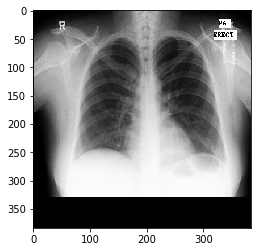

In [14]:
image = load_image('./data/montgomery/images/MCUCXR_0001_0.png')
print(image.shape)
plt.imshow(np.squeeze(image), cmap='gray')

In [68]:
import random
montgomery_root = pathlib.Path('./data/montgomery')

# read image paths using glob and convert them into string format
montgomery_image_paths = [str(path) for path in list(montgomery_root.glob('images/*.png'))]
montgomery_mask_left_paths = [str(path) for path in list(montgomery_root.glob('masks/left/*.png'))]
montgomery_mask_right_paths = [str(path) for path in list(montgomery_root.glob('masks/right/*.png'))]

# shuffle them in a random order
temp = list(zip(montgomery_image_paths, montgomery_mask_left_paths, montgomery_mask_right_paths)) # zip the three paths to make sure they are shuffled together
random.shuffle(temp) # shuffle
montgomery_image_paths, montgomery_mask_left_paths, montgomery_mask_right_paths = zip(*temp) # unzip them
montgomery_image_paths = list(montgomery_image_paths)           # unzipping converts the lists to tuples for some reason...
montgomery_mask_left_paths = list(montgomery_mask_left_paths)   # we are explicitly converting them back to lists
montgomery_mask_right_paths = list(montgomery_mask_right_paths) #

In [73]:
montgomery_image_path_ds = tf.data.Dataset.from_tensor_slices(montgomery_image_paths)
montgomery_mask_left_path_ds = tf.data.Dataset.from_tensor_slices(montgomery_mask_left_paths)
montgomery_mask_right_path_ds = tf.data.Dataset.from_tensor_slices(montgomery_mask_right_paths)

montgomery_image_ds = montgomery_image_path_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

ValueError: 'images' contains no shape.

In [72]:
print(montgomery_image_paths)

['data\\montgomery\\images\\MCUCXR_0030_0.png', 'data\\montgomery\\images\\MCUCXR_0028_0.png', 'data\\montgomery\\images\\MCUCXR_0015_0.png', 'data\\montgomery\\images\\MCUCXR_0072_0.png', 'data\\montgomery\\images\\MCUCXR_0150_1.png', 'data\\montgomery\\images\\MCUCXR_0091_0.png', 'data\\montgomery\\images\\MCUCXR_0099_0.png', 'data\\montgomery\\images\\MCUCXR_0282_1.png', 'data\\montgomery\\images\\MCUCXR_0331_1.png', 'data\\montgomery\\images\\MCUCXR_0057_0.png', 'data\\montgomery\\images\\MCUCXR_0094_0.png', 'data\\montgomery\\images\\MCUCXR_0103_0.png', 'data\\montgomery\\images\\MCUCXR_0334_1.png', 'data\\montgomery\\images\\MCUCXR_0085_0.png', 'data\\montgomery\\images\\MCUCXR_0203_1.png', 'data\\montgomery\\images\\MCUCXR_0338_1.png', 'data\\montgomery\\images\\MCUCXR_0077_0.png', 'data\\montgomery\\images\\MCUCXR_0113_1.png', 'data\\montgomery\\images\\MCUCXR_0054_0.png', 'data\\montgomery\\images\\MCUCXR_0117_1.png', 'data\\montgomery\\images\\MCUCXR_0090_0.png', 'data\\montg

In [ ]:
import pathlib
data_root = pathlib.Path('./data')
print(data_root)

In [ ]:
for item in data_root.iterdir():
    print(item)

In [ ]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

In [ ]:
data_root.glob('*/*')

In [ ]:
path = './data/montgomery/images/MCUCXR_0001_0.png'
image = tf.io.read_file(path)


In [ ]:
img_tensor = tf.image.decode_image(image)
print(img_tensor.shape)

In [10]:
np.max(img_tensor)

255